In [1]:
import numpy as np
from scipy.optimize import newton
import matplotlib.pyplot as plt

# Problem 2

Part B

In [2]:
#(b)

# Log-likelihood derivatives 
def log_likelihood_prime(t, nS=5, nC=25):
    """Calculates the first derivative of the log-likelihood function with respect to t."""
    # Compute st and rt
    st = 3 * (0.25 - 0.25 * np.exp(-4 * t / 3))
    rt = 0.25 + 0.75 * np.exp(-4 * t / 3)
    
    # Compute derivatives of st and rt with respect to t
    dst_dt = 1 * np.exp(-4 * t / 3)  # Corrected to match the explanation above
    drt_dt = -1 * np.exp(-4 * t / 3)  # As you originally had, aligning with the negative exponential derivative
    
    # Log-likelihood derivative calculation
    return nS * (dst_dt / st) + nC * (drt_dt / rt)

def log_likelihood_double_prime(t, nS=5, nC=25):
    """Calculates the second derivative of the log-likelihood function with respect to t."""
    # Compute st and rt
    st = 3 * (0.25 - 0.25 * np.exp(-4 * t / 3))
    rt = 0.25 + 0.75 * np.exp(-4 * t / 3)
    
    # Compute derivatives of st and rt with respect to t
    dst_dt = 1 * np.exp(-4 * t / 3)
    drt_dt = -1 * np.exp(-4 * t / 3)
    
    # Compute second derivatives of st and rt with respect to t
    d2st_dt2 = -4/3 * dst_dt
    d2rt_dt2 = -4/3 * drt_dt
    
    # Log-likelihood second derivative calculation
    return nS * (-dst_dt**2 / st**2 + d2st_dt2 / st) + nC * (-drt_dt**2 / rt**2 + d2rt_dt2 / rt)

In [3]:
initial_t = 0.5

# Use scipy.optimize.newton to find the root of the first derivative (extremum of the log-likelihood)
t_estimated = newton(log_likelihood_prime, initial_t, fprime=log_likelihood_double_prime, args=(5, 25))

print(f"Given ns=5, nc=25, the estimated divergence time t: {t_estimated:.4f}")

/var/folders/t2/7mtp11ks3nnd0l6dwsngdl680000gn/T/ipykernel_5337/3037943102.py:7: RuntimeWarning: overflow encountered in exp
  st = 3 * (0.25 - 0.25 * np.exp(-4 * t / 3))
/var/folders/t2/7mtp11ks3nnd0l6dwsngdl680000gn/T/ipykernel_5337/3037943102.py:8: RuntimeWarning: overflow encountered in exp
  rt = 0.25 + 0.75 * np.exp(-4 * t / 3)
/var/folders/t2/7mtp11ks3nnd0l6dwsngdl680000gn/T/ipykernel_5337/3037943102.py:11: RuntimeWarning: overflow encountered in exp
  dst_dt = 1 * np.exp(-4 * t / 3)  # Corrected to match the explanation above
/var/folders/t2/7mtp11ks3nnd0l6dwsngdl680000gn/T/ipykernel_5337/3037943102.py:12: RuntimeWarning: overflow encountered in exp
  drt_dt = -1 * np.exp(-4 * t / 3)  # As you originally had, aligning with the negative exponential derivative
/var/folders/t2/7mtp11ks3nnd0l6dwsngdl680000gn/T/ipykernel_5337/3037943102.py:15: RuntimeWarning: invalid value encountered in scalar divide
  return nS * (dst_dt / st) + nC * (drt_dt / rt)
/var/folders/t2/7mtp11ks3nnd0l6dw

RuntimeError: Failed to converge after 50 iterations, value is nan.

In [4]:
initial_t = 10

# Use scipy.optimize.newton to find the root of the first derivative (extremum of the log-likelihood)
t_estimated = newton(log_likelihood_prime, initial_t, fprime=log_likelihood_double_prime, args=(5, 25))

print(f"Given ns=5, nc=25, the estimated divergence time t: {t_estimated:.4f}")

RuntimeError: Failed to converge after 50 iterations, value is 47.50000631389639.

In [5]:
# Initial guess for t
initial_t = 0.25
# Use scipy.optimize.newton to find the root of the first derivative (extremum of the log-likelihood)
t_estimated = newton(log_likelihood_prime, initial_t, fprime=log_likelihood_double_prime, args=(5, 25))

print(f"Given ns=5, nc=25, the estimated divergence time t: {t_estimated:.4f}")


Given ns=5, nc=25, the estimated divergence time t: 0.1885


Part C

In [6]:
#(c)
print(f"The second derivative of the log_likelihood function at time t: {t_estimated} is "
      f"{log_likelihood_double_prime(t_estimated, nS=5, nC=25)}")


The second derivative of the log_likelihood function at time t: 0.18848582121067955 is -130.66666666666666


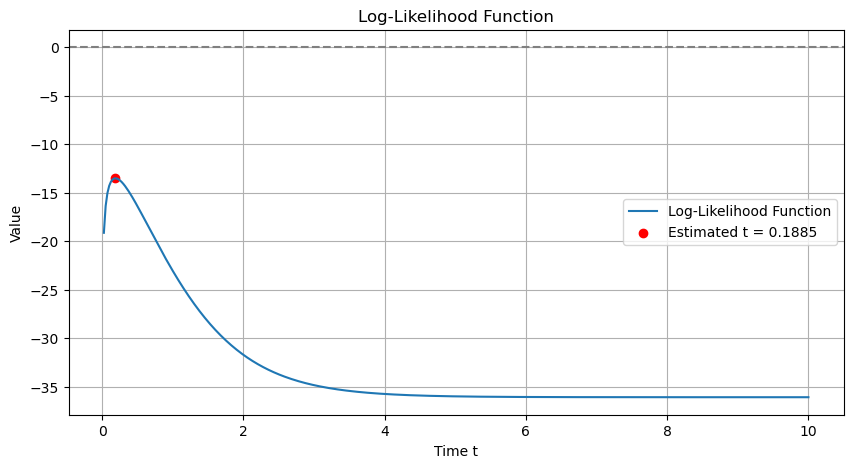

In [7]:
#(c)
def log_likelihood(t, nS=5, nC=25):
    """Calculates the log-likelihood function of t."""
    # Compute st and rt,
    st = 3 * (0.25 - 0.25 * np.exp(-4 * t / 3))
    rt = 0.25 + 0.75 * np.exp(-4 * t / 3)
    if st <= 0 or rt <= 0:
        return np.nan  # Return NaN if st or rt is non-positive, to avoid taking log of non-positive numbers
    return nS * np.log(st) + nC * np.log(rt)

t_values = np.linspace(0, 10, 400)
function_values = [log_likelihood(t, 5, 25) for t in t_values]
estimated_y = log_likelihood(t_estimated, 5, 25)  # Calculate log-likelihood at estimated t


# Plot the log-likelihood function
plt.figure(figsize=(10, 5))
plt.plot(t_values, function_values, label="Log-Likelihood Function")
plt.axhline(0, color='gray', linestyle='--')
plt.scatter([t_estimated], [estimated_y], color='red', label=f"Estimated t = {t_estimated:.4f}")
plt.title("Log-Likelihood Function")
plt.xlabel("Time t")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.show()

As demonstrated, the solution where the derivative of the log-likelihood function equals zero is **0.1885**. Importantly, the outcome of Newton's method is highly sensitive to the initial guess provided. Since the second derivative at this point is negative, we can conclude that it represents a local **maximum** for the parameters $n_{S} = 5 $ and $n_{C} = 25$. This conclusion is corroborated by the plot of the log-likelihood function.


# Problem 3

In [8]:
# (b)


def is_positive_definite_eigen(matrix):
    # Compute the eigenvalues
    eigenvalues = np.linalg.eigvals(matrix)
    # Check if all eigenvalues are greater than zero
    if (np.all(eigenvalues > 0)):
        return("The Hessian matrix is positive definite")
    elif (np.all(eigenvalues < 0)):
        return("The Hessian matrix is negative definite")
    else:
        return("The Hessian matrix is indefinite")

Hf = np.array([[-6, 6],
              [6, 0]])

print("Critial point: (0,0)")
is_positive_definite_eigen(Hf)



Critial point: (0,0)


'The Hessian matrix is indefinite'

In [9]:
# (-1,-1)
Hf = np.array([[-6, 6],
              [6, -12]])

print("Critial point: (-1,-1)")
is_positive_definite_eigen(Hf)

Critial point: (-1,-1)


'The Hessian matrix is negative definite'

In [10]:
# (0,-1)
print("Critial point: (0,-1)")
Hf = np.array([[6, -6],
              [-6, 0]])

is_positive_definite_eigen(Hf)

Critial point: (0,-1)


'The Hessian matrix is indefinite'

In [11]:
# (1,0)
print("Critial point: (1,0)")
Hf = np.array([[6, -6],
              [-6, 12]])

is_positive_definite_eigen(Hf)

Critial point: (1,0)


'The Hessian matrix is positive definite'

After evaluating the Hessian matrices at three critical points—(0,0), (-1,-1), (0,-1), and (1,0)—we find that both (0,0) and (0,-1) are saddle points, while (1,0) is a local minimum and (-1,-1) is a local maximum for the function.


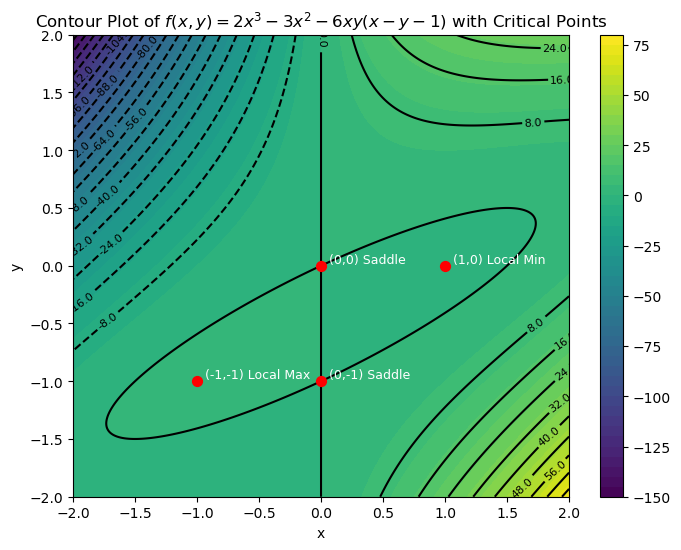

In [12]:
# (c)
# Define the function f(x, y)
def f(x, y):
    return 2*x**3 - 3*x**2 - 6*x*y*(x - y - 1)

# Create a grid of x and y values
x = np.linspace(-2, 2, 1000)
y = np.linspace(-2, 2, 1000)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

# Create a contour plot with labels for better visibility of critical points
plt.figure(figsize=(8, 6))
contours = plt.contour(X, Y, Z, levels=30, colors='black')
plt.clabel(contours, inline=True, fontsize=8, fmt='%1.1f')
contourf = plt.contourf(X, Y, Z, levels=50, cmap='viridis')
plt.colorbar(contourf)

# Annotating the critical points
critical_points = [(0, 0), (0, -1), (1, 0), (-1,-1)]
cp_labels = ['(0,0) Saddle', '(0,-1) Saddle', '(1,0) Local Min', '(-1,-1) Local Max']
for i, (x, y) in enumerate(critical_points):
    plt.scatter(x, y, color='red', s=50, zorder=5)  # Mark critical points
    plt.text(x, y, '  ' + cp_labels[i], color='white', fontsize=9, ha='left', va='bottom')

plt.title('Contour Plot of $f(x, y) = 2x^3 - 3x^2 - 6xy(x - y - 1)$ with Critical Points')
plt.xlabel('x')
plt.ylabel('y')
plt.show()


In [13]:
#(d)
from scipy.optimize import minimize
import numpy as np

# Define the function and its negative
def f(x):
    return 2*x[0]**3 - 3*x[0]**2 - 6*x[0]*x[1]*(x[0] - x[1] - 1)

def neg_f(x):
    return -f(x)

# Define different starting points
starting_points = [(0, 0), (1, 0), (-1, 1), (0.5, -0.5), (-0.5, 0.5)]

# Find the minimum of f and maximum of -f for each starting point using for loops
results_f = []
results_neg_f = []

for start in starting_points:
    result_f = minimize(f, start)
    result_neg_f = minimize(neg_f, start)
    results_f.append((start, result_f.fun, result_f.x))
    results_neg_f.append((start, -result_neg_f.fun, result_neg_f.x))

# Display results
for start, min_f, point_f in results_f:
    print(f"Starting Point: {start} -> Minimum of f: {min_f}, at point: {point_f}")
    print( )

for start, min_neg_f, point_neg_f in results_neg_f:
    print(f"Starting Point: {start} -> Minimum of -f: {min_neg_f}, at point: {point_neg_f}")
    print( )


Starting Point: (0, 0) -> Minimum of f: 0.0, at point: [0. 0.]

Starting Point: (1, 0) -> Minimum of f: -1.0, at point: [1. 0.]

Starting Point: (-1, 1) -> Minimum of f: -5550808007.577093, at point: [-861.53969642  574.69313094]

Starting Point: (0.5, -0.5) -> Minimum of f: -0.9999999999999212, at point: [ 9.99999800e-01 -4.47909316e-08]

Starting Point: (-0.5, 0.5) -> Minimum of f: -5476568621.81335, at point: [-877.53376092  548.64611174]

Starting Point: (0, 0) -> Minimum of -f: 0.0, at point: [0. 0.]

Starting Point: (1, 0) -> Minimum of -f: -1.0, at point: [1. 0.]

Starting Point: (-1, 1) -> Minimum of -f: 5606573018.859791, at point: [1228.29292677 1410.53354554]

Starting Point: (0.5, -0.5) -> Minimum of -f: 3210706.0018725474, at point: [ 5.00030823e-01 -1.03474000e+03]

Starting Point: (-0.5, 0.5) -> Minimum of -f: 14994354.946734795, at point: [ 37.13467489 277.26325098]



As seen from the results above, different starting points yield varying minima for f and −f. This variation is attributed to the nature of the algorithms used in scipy.optimize.minimize (such as 'BFGS', 'Nelder-Mead', 'L-BFGS-B', etc.), which are local optimization methods. These algorithms efficiently find a local minimum near the initial starting point but do not guarantee the discovery of the global minimum unless the function is convex, which is not applicable in this case.

# Dynamic Programming

In [14]:
from Bio.Align.substitution_matrices import load
# Load the BLOSUM62 substitution matrix
blosum62 = load("BLOSUM62")


In [15]:
import numpy as np

def initialize_score_matrix(seq1, seq2, gap_penalty):
    '''Initialize the first row and column of score matrix'''
    m, n = len(seq1), len(seq2)
    score_matrix = np.zeros((m+1, n+1))
    
    # Initialize first row and column
    for i in range(1, m+1):
        score_matrix[i][0] = i * gap_penalty
    for j in range(1, n+1):
        score_matrix[0][j] = j * gap_penalty
    
    return score_matrix

In [16]:
def fill_score_matrix(seq1, seq2, score_matrix, gap_penalty):
    """Fill the rest of matrix from top to bottom and left to right with blosum62 matrix"""
    m, n = len(seq1), len(seq2)
    for i in range(1, m+1):
        for j in range(1, n+1):
            match_score = blosum62.get((seq1[i-1], seq2[j-1]), blosum62.get((seq2[j-1], seq1[i-1]), -1))
            # Calculate the match score between amino acids at current positions i and j in seq1 and seq2
            # Fetch the score directly from the BLOSUM62 matrix using the tuple (seq1[i-1], seq2[j-1]).
            # If the tuple is not found, try with the reversed tuple (seq2[j-1], seq1[i-1]).
            # If neither tuple exists in the matrix, default to a penalty score of -1.
            diagonal = score_matrix[i-1][j-1] + match_score
            delete = score_matrix[i-1][j] + gap_penalty
            insert = score_matrix[i][j-1] + gap_penalty
            score_matrix[i][j] = max(diagonal, delete, insert)
            
    return score_matrix


In [17]:
def traceback(sequence1, sequence2, scoring_matrix, penalty_for_gap):
    """
    Perform the traceback step in sequence alignment using dynamic programming.
    Constructs the alignment by navigating from the bottom-right to the top-left of the scoring matrix.

    sequence1: First sequence being aligned
    sequence2: Second sequence being aligned
    scoring_matrix: Matrix with computed scores for alignments
    penalty_for_gap: Penalty score used for gaps in the alignment (deletion or insertion)
    
    """
    aligned_seq1, aligned_seq2 = "", ""
    index1, index2 = len(sequence1), len(sequence2)
    
    # Trace back from the bottom-right of the matrix to the top-left
    while index1 > 0 and index2 > 0:
        current_score = scoring_matrix[index1][index2]
        diagonal_score = scoring_matrix[index1-1][index2-1]
        left_score = scoring_matrix[index1][index2-1]
        up_score = scoring_matrix[index1-1][index2]

        # Check if the current cell was filled from the diagonal cell
        if current_score == diagonal_score + blosum62.get((sequence1[index1-1], sequence2[index2-1]), blosum62.get((sequence2[index2-1], sequence1[index1-1]), -1)):
            aligned_seq1 += sequence1[index1-1]
            aligned_seq2 += sequence2[index2-1]
            index1 -= 1
            index2 -= 1
        # Check if the current cell was filled from the left cell
        elif current_score == up_score + penalty_for_gap:
            aligned_seq1 += sequence1[index1-1]
            aligned_seq2 += '-'
            index1 -= 1
        # Otherwise, the current cell was filled from the upper cell
        else:
            aligned_seq1 += '-'
            aligned_seq2 += sequence2[index2-1]
            index2 -= 1
    
    # Finish tracing back to the top of the matrix if there are remaining characters in sequence1
    while index1 > 0:
        aligned_seq1 += sequence1[index1-1]
        aligned_seq2 += '-'
        index1 -= 1
    # Finish tracing back to the left of the matrix if there are remaining characters in sequence2
    while index2 > 0:
        aligned_seq1 += '-'
        aligned_seq2 += sequence2[index2-1]
        index2 -= 1

    # Return aligned sequences in the correct order (they are built backwards)
    return aligned_seq1[::-1], aligned_seq2[::-1]


In [19]:
def align_sequences(seq1, seq2, gap_penalty=-2):
    """
    Aligns two biological sequences using dynamic programming with the BLOSUM62 substitution matrix.

    seq1: First sequence (string of amino acids) to align
    seq2: Second sequence (string of amino acids) to align
    gap_penalty: Penalty score for introducing a gap in alignment (default is -2)
    """
    # Initialize the score matrix with base values for the first row and column
    score_matrix = initialize_score_matrix(seq1, seq2, gap_penalty)
    
    # Fill the rest of the score matrix based on sequence comparison and gap penalties
    score_matrix = fill_score_matrix(seq1, seq2, score_matrix, gap_penalty)
    
    # Perform traceback to construct the optimal alignment from the score matrix
    print(traceback(seq1, seq2, score_matrix, gap_penalty))


In [21]:
Sequence_1="PWAGAWHHEE"
Sequence_2="CAWDEAE"
align_sequences(Sequence_1, Sequence_2, gap_penalty=-2)


('PWAGAWHHE-E', '--C-AW-DEAE')
